In [90]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [91]:
tol = 1e-6
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

In [92]:
def shoot2(psi, x, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[1.0000009871993825, 3.000029194934543, 5.0004023710473104, 7.0033831039650885, 9.019281975386892]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.96793572e-01 3.68176014e-01 3.37548251e-01 3.04261126e-01
  2.67119186e-01]
 [8.50101396e-01 7.81267687e-01 7.09400438e-01 6.33258495e-01
  5.50508326e-01]
 [1.41832079e+00 1.28402844e+00 1.14824678e+00 1.00920733e+00
  8.63506446e-01]
 [2.16765381e+00 1.92459925e+00 1.68701483e+00 1.45252801e+00
  1.21659802e+00]
 [3.17782025e+00 2.75760870e+00 2.36025930e+00 1.98224233e+00
  1.61735822e+00]
 [4.54752940e+00 3.84659880e+00 3.20480622e+00 2.61576844e+00
  2.07004061e+00]
 [6.39995939e+00 5.26586120e+00 4.25970727e+00 3.36819741e+00
  2.57491976e+00]
 [8.88831175e+00 7.10164207e+00 5.56549721e+00 4.25111694e+00
  3.12750389e+00]
 [1.22013574e+01 9.45258257e+00 7.16271950e+00 5.27105616e+00
  3.71774602e+00]
 [1.65687530e+01 1.24291986e+01 9.08968547e+00 6.42765277e+00
  4.32939920e+00]
 [2.22657746e+01 1.61

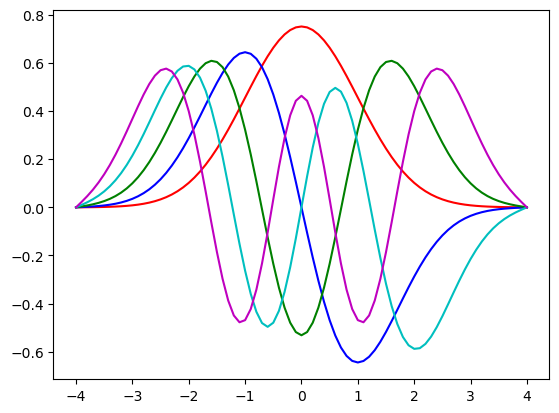

In [93]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [0, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, x0, xspan, args=(epsilon,)) 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0]) < tol:  
            eigenvalues.append(epsilon)
            eigenfunctions.append(np.abs(y[:,0]))
            break  

        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, y[:, 0] / np.sqrt(norm), col[modes-1]) 

A1 = eigenvalues
A2_array = np.array(eigenfunctions)
A2 = A2_array.reshape(5,-1).T

print(A1)
print(A2)
plt.show()